In [71]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm

In [96]:
cuda = torch.device('cuda')
cuda

device(type='cuda')

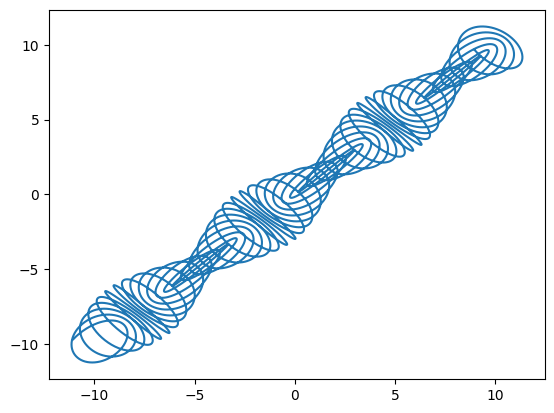

In [81]:
t = torch.linspace(-10, 10, steps = 10000)

x = t - 1.5 * np.cos(15 * t)
y = t - 1.5 * np.sin(16 * t)

plt.plot(x.numpy(), y.numpy())

In [82]:
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston = pd.read_csv('housing.data.csv', header=None, names=names, sep='  ')
boston.drop(labels=['MEDV'], axis=1, inplace=True)
boston.drop(boston[boston['B']>40].index, inplace=True)


C:\Users\SKG\AppData\Local\Temp\ipykernel_19880\2204383522.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  boston = pd.read_csv('housing.data.csv', header=None, names=names, sep='  ')


In [97]:
print(boston['B'].notna().sum(), boston['B'].size)
print(boston['LSTAT'].notna().sum(), boston['LSTAT'].size)
boston.dropna(axis=0, subset=['LSTAT'], inplace=True)

452 452
452 452


In [98]:
print(boston['B'].notna().sum(), boston['B'].size)
print(boston['LSTAT'].notna().sum(), boston['LSTAT'].size)

452 452
452 452


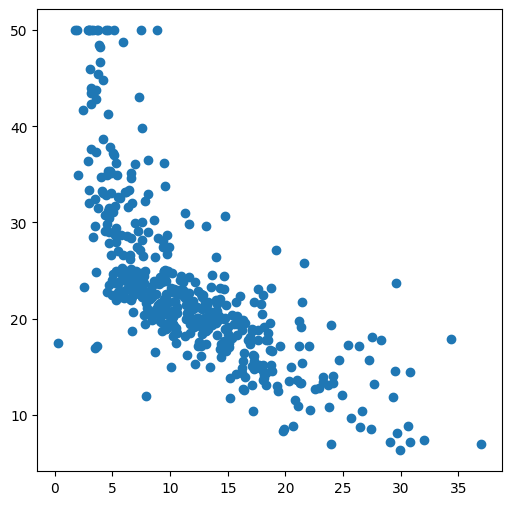

In [99]:
plt.figure(figsize=(6,6))
plt.scatter(boston['B'], boston['LSTAT'])
# plt.xticks([0, 35])

In [76]:
boston['LSTAT']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: LSTAT, Length: 492, dtype: float64

In [108]:
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
print(w, b)

x = torch.tensor(boston['B'] / 10, dtype=torch.float32)
y = torch.tensor(boston['LSTAT'], dtype=torch.float32)

tensor([0.], requires_grad=True) tensor([0.], requires_grad=True)


In [109]:
y_pred = w * x + b
loss = torch.mean((y_pred - y)**2)
loss

tensor(621.8343, grad_fn=<MeanBackward0>)

In [111]:
# propagete gradients
loss.backward()

In [110]:
print("dL/dw = {}\n".format(w.grad))
print("dL/db = {}\n".format(b.grad))

dL/dw = None

dL/db = None



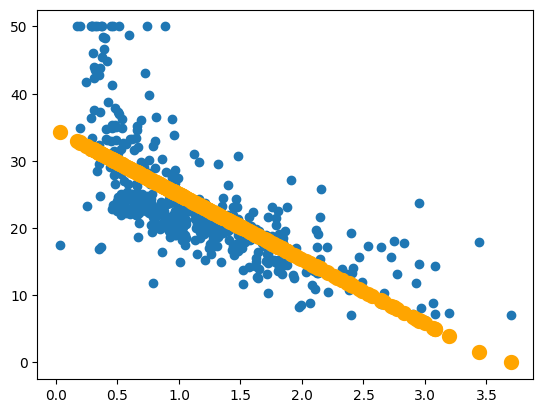

100%|██████████| 3000/3000 [00:39<00:00, 75.05it/s]

loss =  38.605915


In [114]:
from IPython.display import clear_output

w = torch.zeros(1, requires_grad=True)

x = torch.tensor(boston['B'] / 10, dtype=torch.float32)
y = torch.tensor(boston['LSTAT'], dtype=torch.float32)

for i in tqdm(range(3000)):

    y_pred = w * x  + b
    # 
    # activation function
    #y_pred = torch.where(y_pred>0., y_pred, torch.zeros_like(y_pred))
    loss = torch.mean( (y_pred - y)**2 )
    loss.backward()

    w.data -= 0.006 * w.grad.data
    b.data -= 0.006 * b.grad.data
    
    #zero gradients
    w.grad.data.zero_()
    b.grad.data.zero_()
    
    # the rest of code is just bells and whistles
    if (i+1)%5==0:
        clear_output(True)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.scatter(x.data.numpy(), y_pred.data.numpy(), color='orange', linewidth=5)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.5:
            print("Done!")
            break

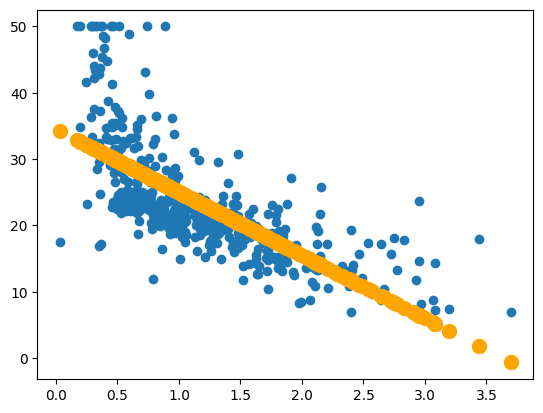

loss =  38.632366


In [149]:
# Now we do not divide the x values by 10. See what happens next
w = torch.zeros(1, requires_grad=True)
x = torch.tensor(boston['B'] / 10, dtype=torch.float32)
y = torch.tensor(boston['LSTAT'], dtype=torch.float32)
b = torch.zeros(1, requires_grad=True)

grad_history = []

for i in range(100):

    y_pred = w * x  + b
    loss = torch.mean( (y_pred - y)**2 )
    loss.backward()

    
    w.grad.data=torch.clip(w.grad.data, max=25)
    b.grad.data=torch.clip(b.grad.data, max=25) 

    grad_history.append((w.grad.item(), b.grad.item()))


    # Be extremely careful with accessing the .data attribute!
    w.data -= 0.3 * w.grad.data
    b.data -= 0.3 * b.grad.data


    #zero gradients
    w.grad.data.zero_()
    b.grad.data.zero_()
    
    # the rest of code is just bells and whistles
    if (i+1)%5==0:
        clear_output(True)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.scatter(x.data.numpy(), y_pred.data.numpy(), color='orange', linewidth=5)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.5:
            print("Done!")
            break


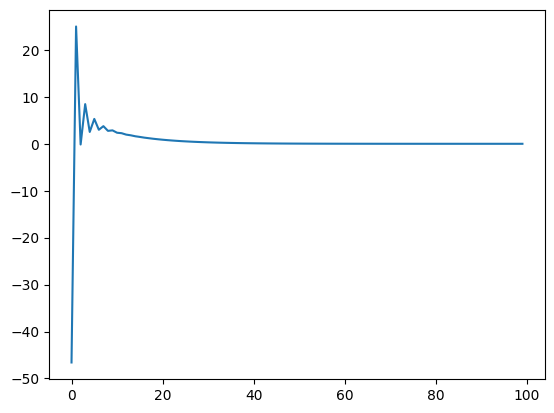

In [150]:
plt.plot([element[0] for element in grad_history], )

In [220]:
from notmnist import load_notmnist
X_train, y_train, X_test, y_test = load_notmnist(letters='AB')
X_train, X_test = X_train.reshape ([-1, 784]), X_test.reshape([-1, 784])

print("Train size = %i, test_size = %i"%(len(X_train),len(X_test)))

Parsing...
found broken img: ./notMNIST_small\A\RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png [it's ok if <10 images are broken]
Done
Train size = 2808, test_size = 937


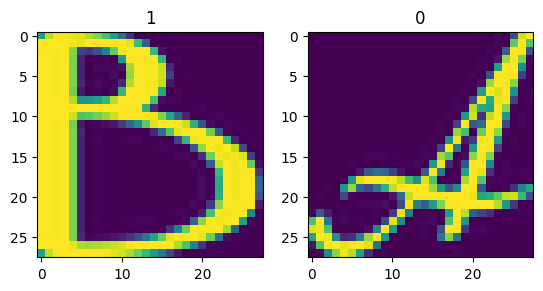

In [221]:
for i in [0,1]:
    plt.subplot(1, 2, i + 1)
    plt.imshow(X_train[i].reshape([28,28]))
    plt.title(str(y_train[i]))

In [222]:
from torch import nn
import torch.nn.functional as F

print(nn.Module.__doc__)

Base class for all neural network modules.

    Your models should also subclass this class.

    Modules can also contain other Modules, allowing to nest them in
    a tree structure. You can assign the submodules as regular attributes::

        import torch.nn as nn
        import torch.nn.functional as F

        class Model(nn.Module):
            def __init__(self):
                super().__init__()
                self.conv1 = nn.Conv2d(1, 20, 5)
                self.conv2 = nn.Conv2d(20, 20, 5)

            def forward(self, x):
                x = F.relu(self.conv1(x))
                return F.relu(self.conv2(x))

    Submodules assigned in this way will be registered, and will have their
    parameters converted too when you call :meth:`to`, etc.

    .. note::
        As per the example above, an ``__init__()`` call to the parent class
        must be made before assignment on the child.

    :ivar training: Boolean represents whether this module is in training or
         

In [154]:
# create a network that stacks layers on top of each other
model = nn.Sequential()

# add first "dense" layer with 784 input units and 1 output unit. 
model.add_module('l1', nn.Linear(784, 1))

# add softmax activation for probabilities. Normalize over axis 1
# note: layer names must be unique
model.add_module('l2', nn.Sigmoid())

In [223]:
print("Weight shapes:", [w.shape for w in model.parameters()])

Weight shapes: [torch.Size([1, 784]), torch.Size([1])]


In [224]:
# create dummy data with 3 samples and 784 features
x = torch.tensor(X_train[:3], dtype=torch.float32)
y = torch.tensor(y_train[:3], dtype=torch.float32)

# compute outputs given inputs, both are variables
y_predicted = model(x)[:, 0]

y_predicted # display what we've got

tensor([0.5325, 0.3439, 0.5990], grad_fn=<SelectBackward0>)

In [225]:
crossentropy = -(y * y_predicted.log() + (1. - y) * (1. - y_predicted).log())
print(crossentropy)
loss = torch.mean(crossentropy)
print(loss, loss.size())

assert tuple(crossentropy.size()) == (3,), "Crossentropy must be a vector with element per sample"
# assert tuple(loss.size()) == (1,), "Loss must be scalar. Did you forget the mean/sum?"
assert crossentropy.data.numpy()[0] > 0, "Crossentropy must non-negative, zero only for perfect prediction"
assert loss.data.numpy() <= np.log(5), "Loss is too large even for untrained model. Please double-check it."

tensor([0.6301, 0.4214, 0.9139], grad_fn=<NegBackward0>)
tensor(0.6551, grad_fn=<MeanBackward0>) torch.Size([])


In [226]:
opt = torch.optim.RMSprop(model.parameters(), lr=0.01)

# here's how it's used:
loss.backward()      # add new gradients
opt.step()           # change weights
opt.zero_grad()      # clear gradients

In [227]:
# dispose of old variables to avoid bugs later
del x, y, y_predicted, loss, y_pred

NameError: name 'y_pred' is not defined

In [242]:
# create network again just in case
model = nn.Sequential()
model.add_module('first', nn.Linear(784, 1))
model.add_module('second', nn.Sigmoid())

opt = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

In [245]:
history = []

for i in range(10000):
    
    # sample 256 random images
    ix = np.random.randint(0, len(X_train), 5)
    x_batch = torch.tensor(X_train[ix], dtype=torch.float32)
    y_batch = torch.tensor(y_train[ix], dtype=torch.float32)
    
    # predict probabilities
    #print(model(x_batch)[x_batch, 0])
    y_predicted = model(x_batch)[:, 0]
    
    assert y_predicted.dim() == 1, "did you forget to select first column with [:, 0]"
    
    # compute loss, just like before
    # crossentropy = -(y_batch * y_predicted.log() + (1. - y_batch) * (1. - y_predicted).log())

    # loss = torch.mean(crossentropy) ### YOUR CODE
    loss = criterion(y_predicted, y_batch)

    # compute gradients
    loss.backward() ### YOUR CODE
    
    # Adam step
    opt.step() ### YOUR CODE
    
    # clear gradients
    opt.zero_grad() ### YOUR CODE
    
    history.append(loss.data.numpy())
    
    if i % 50 == 0:
        print("step #%i | mean loss = %.3f" % (i, np.mean(history[-10:])))

step #0 | mean loss = 3.954
step #50 | mean loss = 3.833
step #100 | mean loss = 2.002
step #150 | mean loss = 3.306
step #200 | mean loss = 3.612
step #250 | mean loss = 2.947
step #300 | mean loss = 3.502
step #350 | mean loss = 3.275
step #400 | mean loss = 3.453
step #450 | mean loss = 3.395
step #500 | mean loss = 2.473
step #550 | mean loss = 4.493
step #600 | mean loss = 2.477
step #650 | mean loss = 3.741
step #700 | mean loss = 3.311
step #750 | mean loss = 2.500
step #800 | mean loss = 3.051
step #850 | mean loss = 4.666
step #900 | mean loss = 2.832
step #950 | mean loss = 2.573
step #1000 | mean loss = 2.998
step #1050 | mean loss = 2.929
step #1100 | mean loss = 4.188
step #1150 | mean loss = 3.194
step #1200 | mean loss = 2.657
step #1250 | mean loss = 3.499
step #1300 | mean loss = 3.115
step #1350 | mean loss = 2.998
step #1400 | mean loss = 3.656
step #1450 | mean loss = 4.413
step #1500 | mean loss = 4.493
step #1550 | mean loss = 3.363
step #1600 | mean loss = 2.559


In [246]:
# create dummy data with 3 samples and 784 features
x = torch.tensor(X_test, dtype=torch.float32)
y = torch.tensor(y_test, dtype=torch.float32)

# compute outputs given inputs, both are variables
# y_predicted = model(x)[:, 0]

# y_predicted # display what we've got

In [247]:
# use your model to predict classes (0 or 1) for all test samples
predicted_y_test = model(x)[:, 0]
predicted_y_test = np.array(predicted_y_test > 0.5)
         
assert isinstance(predicted_y_test, np.ndarray), "please return np array, not %s" % type(predicted_y_test)
assert predicted_y_test.shape == y_test.shape, "please predict one class for each test sample"
assert np.in1d(predicted_y_test, y_test).all(), "please predict class indexes"

accuracy = np.mean(predicted_y_test == y_test)

print("Test accuracy: %.5f" % accuracy)
assert accuracy > 0.95, "try training longer"

print('Great job!')

Test accuracy: 0.95518
Great job!
